In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Đọc dữ liệu từ file gold_clean.csv

In [76]:
df = pd.read_csv('gold_clean.csv', index_col=0)
df.head()


,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,289.5,289.5,280.0,283.7,21621,USD
1,2000-01-05,283.7,285.0,281.0,282.1,25448,USD
2,2000-01-06,281.6,282.8,280.2,282.4,19055,USD
3,2000-01-07,282.5,284.5,282.0,282.9,11266,USD
4,2000-01-10,282.4,283.9,281.8,282.7,30603,USD


## Phân tích giá mở cửa từ năm 2000 đến năm 2022

C:\Users\yukih\AppData\Local\Temp\ipykernel_1664\2278049746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open['Date'] = open['Date'].str[:4]


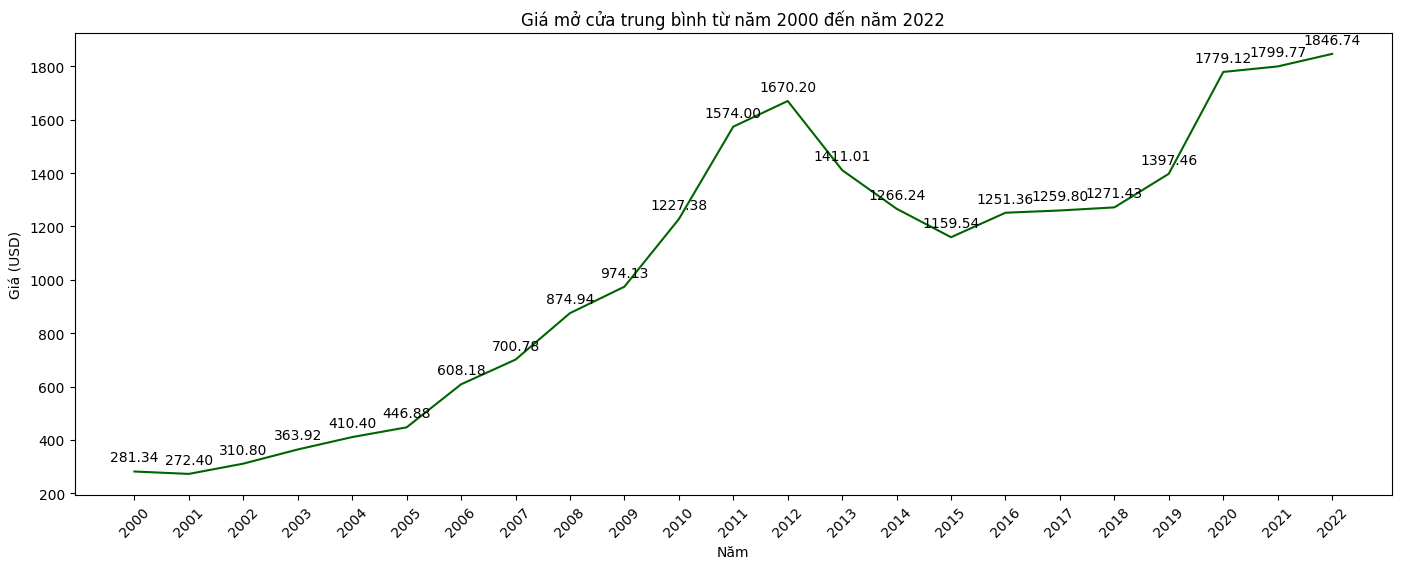

In [68]:
# Tính giá vàng mở cửa trung bình theo từng năm
open=df[['Date', 'Open']]
open['Date'] = open['Date'].str[:4]
open_by_year = open.groupby(by = 'Date', axis=0, as_index=False).mean()

# Trực quan bằng biểu đồ đường để thấy sự thay đổi theo từng năm
plt.figure(figsize=(17,6))
sns.lineplot(x='Date', y='Open', data=open_by_year, color='darkgreen')
plt.xticks(rotation=45)
plt.xlabel("Năm")
plt.ylabel("Giá (USD)")
plt.title("Giá mở cửa trung bình từ năm 2000 đến năm 2022")
for x,y in zip(open_by_year['Date'], open_by_year['Open']):
    
    label = "{:.2f}".format(y)

    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset pixels", 
                 xytext=(0,10), 
                 ha='center')

## Phân tích số lượng giao dịch trung bình theo từng năm

C:\Users\yukih\AppData\Local\Temp\ipykernel_1664\687836144.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vol['Date'] = vol['Date'].str[:4]


Text(0.5, 1.0, 'Số lượng vàng giao dịch trung bình theo từng năm từ năm 2000 đến năm 2022')

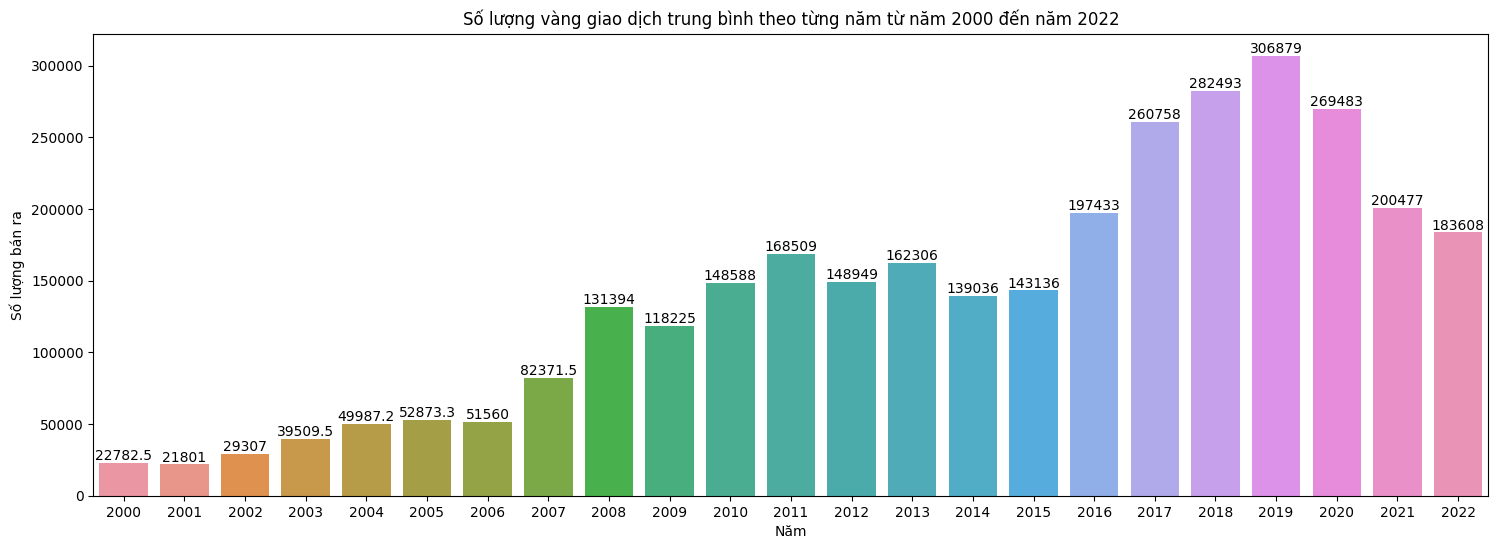

In [69]:
# Tính số lượng trung bình bán ra theo từng năm
vol=df[['Date', 'Volume']]
vol['Date'] = vol['Date'].str[:4]
vol_by_year = vol.groupby(by = 'Date', axis=0, as_index=False).mean()
vol_by_year

# Trực quan bằng biểu đồ cột đứng để thấy sự thay đổi theo từng năm
plt.figure(figsize=(18,6))
a = sns.barplot(x='Date', y='Volume', data=vol_by_year)
plt.bar_label(a.containers[0], label_type='edge')
plt.xlabel("Năm")
plt.ylabel("Số lượng bán ra")
plt.title("Số lượng vàng giao dịch trung bình theo từng năm từ năm 2000 đến năm 2022")

##### Sự tăng giảm số lượng giao dịch theo từng năm

In [73]:
vol2=df[['Date', 'Volume']]
vol2['Date'] = vol2['Date'].str[:4]
vol_by_year2 = vol2.groupby(by = 'Date', axis=0, as_index=False).mean()
vol_by_year2

# Tính sự tăng giảm số lượng giao dịch và phần trăm
vol_by_year2['Change'] = vol_by_year2['Volume'] - vol_by_year2['Volume'].shift(1)
vol_by_year2.iloc[0, 2] = 0

vol_by_year2['PercentChange'] = (vol_by_year2['Change'].div(vol_by_year2['Volume'].shift(1))).multiply(100)
vol_by_year2.iloc[0, 3] = 0
vol_by_year2['PercentChange'] = vol_by_year2['PercentChange'].round(decimals=2)


C:\Users\yukih\AppData\Local\Temp\ipykernel_1664\2150507586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vol2['Date'] = vol2['Date'].str[:4]


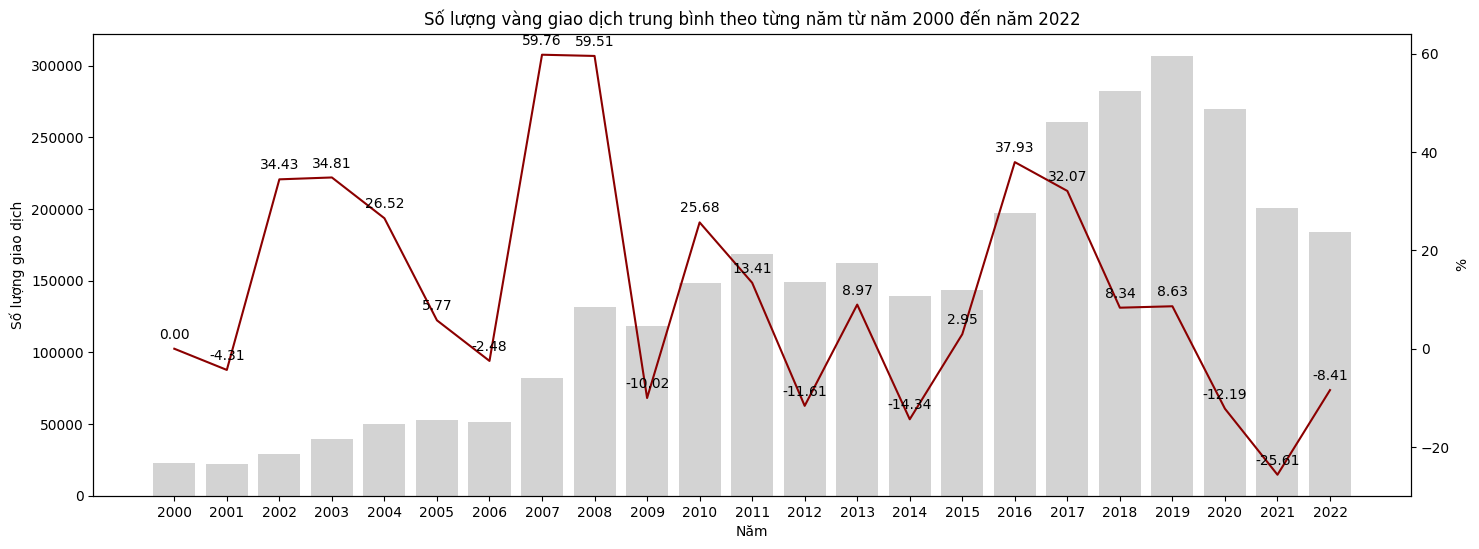

In [75]:
fig, plot01 = plt.subplots(figsize=(17,6))
plot02 = plot01.twinx()

ax = sns.barplot(x='Date', y='Volume', data=vol_by_year, ax=plot01, color='lightgrey')
# plot01.bar_label(ax.containers[0])

sns.lineplot(x='Date', y='PercentChange', data=vol_by_year2, ax=plot02, color='darkred')
for x,y in zip(vol_by_year2['Date'], vol_by_year2['PercentChange']):
    label = "{:.2f}".format(y)
    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset pixels", 
                 xytext=(0,10), 
                 ha='center')   

plot01.set_xlabel('Năm')
plot01.set_ylabel('Số lượng giao dịch')
plot02.set_ylabel('%')

plt.title("Số lượng vàng giao dịch trung bình theo từng năm từ năm 2000 đến năm 2022")
plt.show()

## Tìm mối tương quan giữa giá mở cửa và số lượng giao dịch

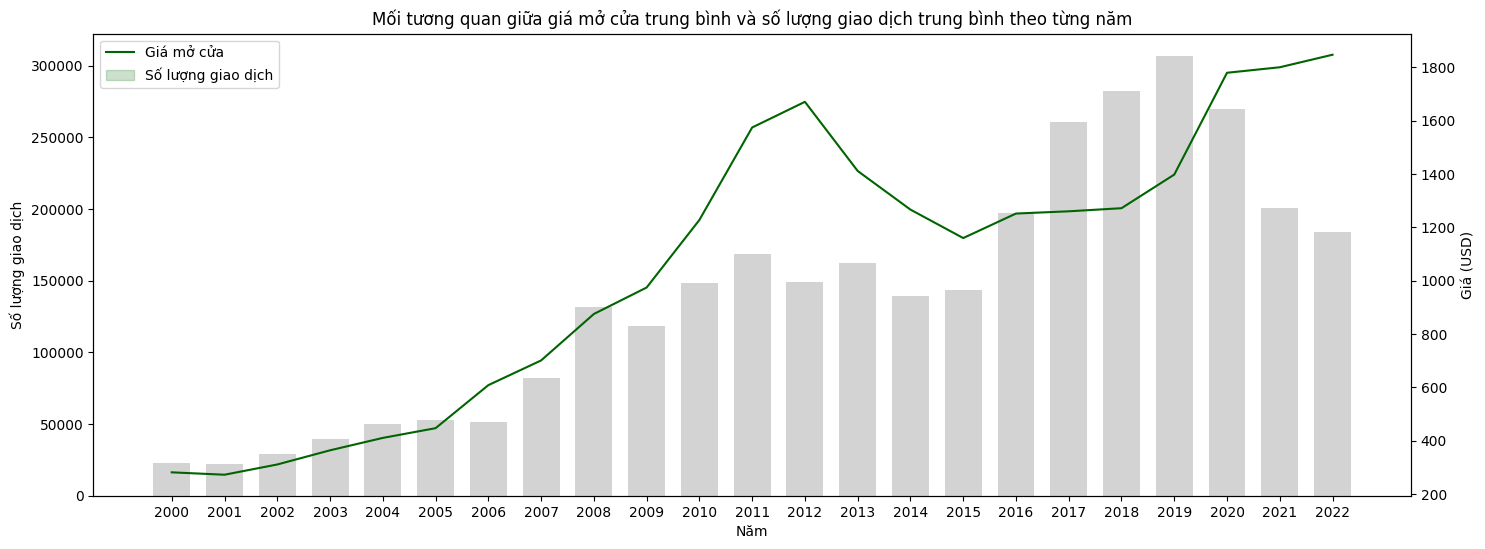

In [72]:
#Tạo biểu đồ
fig, plot1 = plt.subplots(figsize=(17,6))
plot2 = plot1.twinx()

sns.barplot(x='Date', y='Volume', data=vol_by_year, color='lightgrey', ax=plot1, label='Số lượng giao dịch', width=0.7)
sns.lineplot(x='Date', y='Open', data=open_by_year, color='darkgreen', ax=plot2, label='Giá mở cửa')

# Chỉnh sửa biểu đồ
plot1.set_xlabel("Năm")
plot1.set_ylabel("Số lượng giao dịch")
plot2.set_ylabel("Giá (USD)")
plt.title("Mối tương quan giữa giá mở cửa trung bình và số lượng giao dịch trung bình theo từng năm")
plt.legend(['Giá mở cửa', 'Số lượng giao dịch'])
plt.show()

In [77]:
vol_by_year2['Volume'].corr(open_by_year['Open'])

0.8211786268508551

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
X = open_by_year['Open'].values
model = LinearRegression()
model.fit(X.reshape(-1,1), vol_by_year2['Volume'].values)

y = model.predict(X.reshape(-1,1))

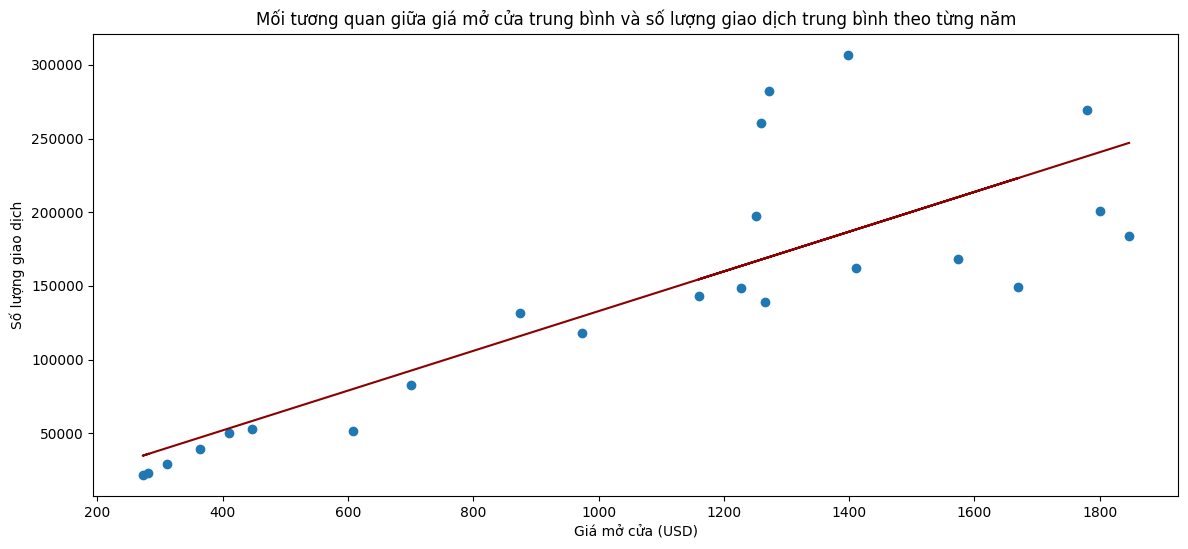

In [84]:
plt.figure(figsize=(14,6))
plt.scatter(open_by_year['Open'], vol_by_year2['Volume'])
plt.plot(X, y, color='darkred')
plt.xlabel('Giá mở cửa (USD)')
plt.ylabel('Số lượng giao dịch')
plt.title('Mối tương quan giữa giá mở cửa trung bình và số lượng giao dịch trung bình theo từng năm')
plt.show()